In [1]:
# フロス警部のストレス
# 演習1：分散共分散行列と相関行列を求める
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Duplicate key in file PosixPath('/home/junya/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:   IPAexGothic')


In [2]:
# x1:犯罪件数、x2:娯楽施設
x1 = np.array([12, 36, 24, 25, 17, 23, 35, 18, 26, 32])
x2 = np.array([16, 27, 17, 28, 24, 21, 31, 15, 19, 24])
N  = 10

In [3]:
# 統計量の計算
x1x1 = x1 * x1
x2x2 = x2 * x2
x1x2 = x1 * x2
print(x1x1, x2x2, x1x2)

[ 144 1296  576  625  289  529 1225  324  676 1024] [256 729 289 784 576 441 961 225 361 576] [ 192  972  408  700  408  483 1085  270  494  768]


In [4]:
# 平方和と積和
sx1x1 = np.sum(x1x1) - np.sum(x1) * np.sum(x1) / N
sx2x2 = np.sum(x2x2) - np.sum(x2) * np.sum(x2) / N
sx1x2 = np.sum(x1x2) - np.sum(x1) * np.sum(x2) / N
print(sx1x1 ,sx2x2, sx1x2)

557.6000000000004 269.60000000000036 274.39999999999964


In [5]:
# 分散共分散行列
var_cov_mat = np.array([[sx1x1 / (N - 1), sx1x2 / (N - 1)], [sx1x2 / (N - 1), sx2x2 / (N - 1)]])
print(var_cov_mat)

[[61.95555556 30.48888889]
 [30.48888889 29.95555556]]


In [6]:
# 相関行列
cor_mat = np.array([[1 , var_cov_mat[0][1] / (np.sqrt(var_cov_mat[0][0] * var_cov_mat[1][1]))], [var_cov_mat[0][1] / (np.sqrt(var_cov_mat[0][0] * var_cov_mat[1][1])), 1]])
print(cor_mat)

[[1.         0.70772214]
 [0.70772214 1.        ]]


In [7]:
# 演習2:分散共分散行列の固有値・固有ベクトルの算出
# wが固有値、vが固有ベクトル
w, v = np.linalg.eig(var_cov_mat)
λ1 = w[0]
λ2 = w[1]
# λ1の固有ベクトルをa11, a12とする。vの1列目がそれに該当する
a11 = v[0][0]
a12 = v[1][0]
print(λ1, λ2, a11, a12)
# 第１主成分z1
print("z1 = " + str(a11) + " × x1 + " + str(a12) + " × x2")
# 第２主成分z2
a21 = v[0][1]
a22 = v[1][1]
print("z2 = " + str(a21) + " × x1 + " + str(a22) + " × x2")

80.38769672741724 11.523414383693948 0.8557692766348619 0.517357656914291
z1 = 0.8557692766348619 × x1 + 0.517357656914291 × x2
z2 = -0.517357656914291 × x1 + 0.8557692766348619 × x2


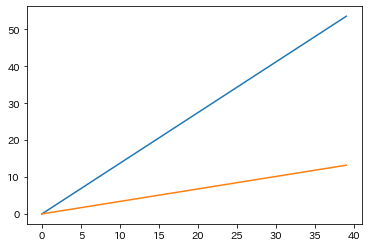

In [19]:
# 主成分の描画
fig = plt.figure()

linex1 = np.arange(0, 40)
linex2 = np.arange(0, 40)

z1 = a11 * linex1 + a12 * linex2
z2 = a21 * linex1 + a22 * linex2

plt.plot(z1)
plt.plot(z2)
plt.show()

In [9]:
# 演習3:主成分得点の算出
# 定数項の算出
a0 = - (a11 * (np.sum(x1) / N) + a12 * (np.sum(x2) / N))
print(a0)

-32.708418044041835


In [10]:
# 第1主成分の主成分得点を求める
z = a11 * x1 + a12 * x2 + a0
print(z)

[-14.16146421  12.06793265  -3.37487524   3.17182827  -5.74375658
  -2.16121389  13.281594    -9.54420621  -0.62862137   7.09278257]


In [11]:
# 演習4:寄与率と因子負荷の算出
# 寄与率の算出
con_rate_1 = λ1 / (λ1 + λ2)
con_rate_2 = λ2 / (λ1 + λ2)
print(con_rate_1, con_rate_2)

0.8746243599453029 0.12537564005469712


In [12]:
# 因子負荷の算出
fact_load_1 = np.sqrt(λ1) * a11 / np.sqrt(var_cov_mat[0][0])
fact_load_2 = np.sqrt(λ1) * a12 / np.sqrt(var_cov_mat[1][1])
print(fact_load_1, fact_load_2)

0.9747906514311516 0.8475142020526862
